### Edgar Moises Hernandez-Gonzalez
#### 25/07/20
#### Escalograma con CWT de EEG de BCI-II-III

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt

In [2]:
#la muestra 2 es mano derecha para el train del sujeto 1
# canal C3 (canal 1)
# canal C4 (canal 3) (usar este)
canal = pd.read_csv("MIEEG_train.csv", header=None).iloc[1, 768:1536]

In [3]:
canal.shape

(768,)

(768,)


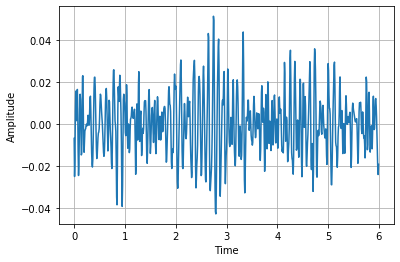

In [4]:
# 6 segundos con fs=128Hz
fs = 128
time = np.arange(0, 6, 1/fs)
sig = canal
print(sig.shape)

plt.plot(time, sig)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [5]:
escalas = pywt.scale2frequency('cmor3-3', np.arange(8,30.5,0.5)) / (1/fs)
print(escalas)

[48.         45.17647059 42.66666667 40.42105263 38.4        36.57142857
 34.90909091 33.39130435 32.         30.72       29.53846154 28.44444444
 27.42857143 26.48275862 25.6        24.77419355 24.         23.27272727
 22.58823529 21.94285714 21.33333333 20.75675676 20.21052632 19.69230769
 19.2        18.73170732 18.28571429 17.86046512 17.45454545 17.06666667
 16.69565217 16.34042553 16.         15.67346939 15.36       15.05882353
 14.76923077 14.49056604 14.22222222 13.96363636 13.71428571 13.47368421
 13.24137931 13.01694915 12.8       ]


In [6]:
coef, freqs = pywt.cwt(sig, escalas, 'cmor3-3', sampling_period = (1 / fs))

In [7]:
x = abs(coef)

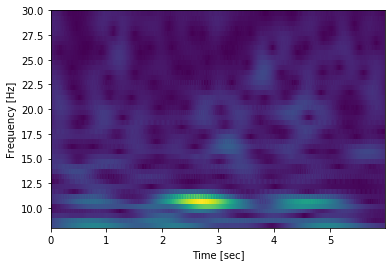

In [8]:
plt.pcolormesh(time, freqs, x)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

(45, 768)


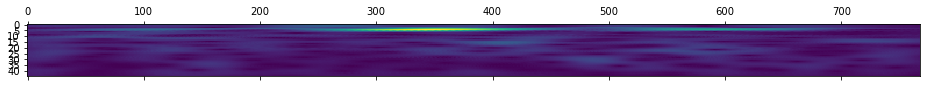

In [9]:
print(x.shape)
plt.matshow(x)
plt.show()